In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Nan, eliminar o no las filas si los ann son pequeño %
# ver la distribución de cada columna y graficos 
# estudiar paises origen / destino 
# buscar correlaciones entre aprobado/rechazado país origen/destino
# revisar notebook para ver más cosas que estudiar

In [2]:
asylum = asylum = pd.read_csv('Data/asylum_decisions.csv')

In [3]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
2,2016,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,164926,121182,158,5398,291664
3,2017,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,34201,55274,107,7309,96891
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332


In [4]:
print(asylum.shape)
print(asylum.info())

(101476, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101476 entries, 0 to 101475
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Year                      101476 non-null  int64 
 1   Country of origin         101476 non-null  object
 2   Country of origin (ISO)   101476 non-null  object
 3   Country of asylum         101476 non-null  object
 4   Country of asylum (ISO)   101476 non-null  object
 5   Authority                 101476 non-null  object
 6   Stage of procedure        99339 non-null   object
 7   Cases / Persons           101476 non-null  object
 8   Recognized decisions      101476 non-null  int64 
 9   Complementary protection  101476 non-null  int64 
 10  Rejected decisions        101476 non-null  int64 
 11  Otherwise closed          101476 non-null  int64 
 12  Total decisions           101476 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 10.1+ MB


In [5]:
# comprobamos distribución de valores por columna
print(asylum['Authority'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Stage of procedure'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Cases / Persons'].value_counts(dropna=False)/len(asylum)*100)

G    87.099413
U    12.263984
J     0.636604
Name: Authority, dtype: float64
FI     57.422445
AR     17.719461
FA      7.862943
RA      4.738066
IN      3.148528
EO      3.072648
JR      2.852891
NaN     2.105917
TA      0.427687
SP      0.298593
CA      0.174425
BL      0.093618
TP      0.081793
TR      0.000985
Name: Stage of procedure, dtype: float64
P    92.683984
C     7.316016
Name: Cases / Persons, dtype: float64


In [6]:
pd.DataFrame(asylum['Country of origin'].value_counts(dropna=False)/len(asylum)*100).head(10)


,Country of origin
Dem. Rep. of the Congo,2.142378
Iraq,2.131538
Afghanistan,2.081280
Somalia,2.068469
Iran (Islamic Rep. of),1.971895
Pakistan,1.917695
Syrian Arab Rep.,1.889117
Nigeria,1.879262
Sudan,1.838858
Ethiopia,1.673302


In [7]:
pd.DataFrame(asylum['Country of asylum'].value_counts(dropna=False)/len(asylum)*100).head(10)

,Country of asylum
United States of America,6.904096
Sweden,5.035673
Germany,5.021877
Canada,4.342899
United Kingdom of Great Britain and Northern Ireland,4.181284
France,4.079782
Netherlands (Kingdom of the),3.250030
Norway,3.184990
Belgium,3.149513
Australia,3.015491


<Axes: >

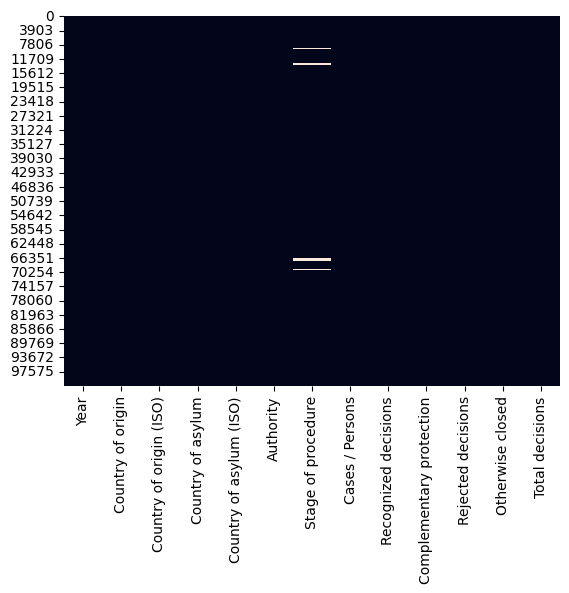

In [8]:
# heatmap para ver los Nan, como hemos visto antes solo hay una columna con nulos, que respresenan el 2,1% de los datos
sns.heatmap(asylum.isnull(), cbar=False)


In [9]:
# vamos a comparar la distribución de los datos en el DataFrame total con solo los datos donde hay Nan para ver si hay alguna diferencia 
asylum_nan = asylum[asylum['Stage of procedure'].isna()]

In [10]:
print(asylum_nan['Authority'].value_counts(dropna=False)/len(asylum_nan)*100)

print(asylum_nan['Cases / Persons'].value_counts(dropna=False)/len(asylum_nan)*100)

G    99.906411
U     0.093589
Name: Authority, dtype: float64
P    100.0
Name: Cases / Persons, dtype: float64


In [11]:
pd.DataFrame(asylum_nan['Country of origin'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of origin
Syrian Arab Rep.,1.029481
Iraq,1.029481
Guinea-Bissau,0.982686
Tunisia,0.982686
Benin,0.982686
Viet Nam,0.982686
Togo,0.982686
North Macedonia,0.982686
Myanmar,0.982686
Bosnia and Herzegovina,0.982686


In [12]:
pd.DataFrame(asylum_nan['Country of asylum'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of asylum
Germany,99.906411
United Arab Emirates,0.093589


In [13]:
# observamos que los nulos se concentran casi en un 100% en las solicitudes de asilo en Alemania, por lo que vamos utilizar 
# el método KNN Imputer para rellenar los nulos sin temor a que se distorsione el dataset y cambiar la dsitribución de los datos

In [14]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
2,2016,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,164926,121182,158,5398,291664
3,2017,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,34201,55274,107,7309,96891
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332


In [15]:
# creamos un diccionario con los valores de las columnas que vamos a utilizar para el imputer
country_of_origin_mapping = dict(enumerate(asylum['Country of origin'].astype('category').cat.categories))
country_of_asylum_mapping = dict(enumerate(asylum['Country of asylum'].astype('category').cat.categories))
stage_of_procedure_mapping = dict(enumerate(asylum['Stage of procedure'].astype('category').cat.categories))
authority_mapping = dict(enumerate(asylum['Authority'].astype('category').cat.categories))

# Create a copy of the asylum dataframe to avoid modifying the original dataframe
asylum_imputed = asylum.copy()

# Convert columns to numeric codes
asylum_imputed['Country of origin'] = asylum_imputed['Country of origin'].astype('category').cat.codes
asylum_imputed['Country of asylum'] = asylum_imputed['Country of asylum'].astype('category').cat.codes
asylum_imputed['Stage of procedure'] = asylum_imputed['Stage of procedure'].astype('category').cat.codes
asylum_imputed['Authority'] = asylum_imputed['Authority'].astype('category').cat.codes

# Convert back NaN values to NaN
asylum_imputed = asylum_imputed.replace(-1, np.nan)


In [22]:
# eliminamos las columnas que no aportan información para el imputer
asylum_imputed = asylum_imputed.drop(columns=['Cases / Persons','Country of origin (ISO)','Country of asylum (ISO)'],axis=1)

In [19]:
# comprobamos que la distribución de Nan es la misma que antes
print(asylum_imputed['Stage of procedure'].value_counts(dropna=False)/len(asylum_imputed)*100)

5.0     57.422445
0.0     17.719461
4.0      7.862943
8.0      4.738066
6.0      3.148528
3.0      3.072648
7.0      2.852891
NaN      2.105917
10.0     0.427687
9.0      0.298593
2.0      0.174425
1.0      0.093618
11.0     0.081793
12.0     0.000985
Name: Stage of procedure, dtype: float64


In [24]:
asylum_imputed.shape

(101476, 10)

In [25]:
asylum.shape

(101476, 13)

In [23]:
asylum_imputed.head()

,Year,Country of origin,Country of asylum,Authority,Stage of procedure,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,192,136,0,10.0,0,248201,0,16687,264888
1,2015,192,136,0,10.0,0,148379,0,21,148400
2,2016,178,63,0,NaN,164926,121182,158,5398,291664
3,2017,178,63,0,NaN,34201,55274,107,7309,96891
4,2022,178,63,0,5.0,15078,51754,34,6466,73332


In [48]:
from sklearn.impute import KNNImputer

# Use KNNImputer
imputer = KNNImputer(n_neighbors=3)
asylum_imputed = imputer.fit_transform(asylum_imputed)

# Convert the imputed DataFrame back to its original form
asylum_imputed = pd.DataFrame(asylum_imputed, columns=['Year', 'Country of origin', 'Country of asylum', 'Authority', 'Stage of procedure', 'Recognized decisions', 'Complementary protection', 'Rejected decisions', 'Otherwise closed', 'Total decisions'])

# Convert numerical values back to categories if necessary
asylum_imputed['Country of origin'] = asylum_imputed['Country of origin'].astype('category').cat.codes
asylum_imputed['Country of asylum'] = asylum_imputed['Country of asylum'].astype('category').cat.codes
asylum_imputed['Stage of procedure'] = asylum_imputed['Stage of procedure'].astype('category').cat.codes

In [51]:
asylum

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
2,2016,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,164926,121182,158,5398,291664
3,2017,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,34201,55274,107,7309,96891
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101471,2007,Croatia,HRV,Australia,AUS,G,FI,P,5,0,0,0,5
101472,2007,India,IND,Australia,AUS,G,FI,P,12,0,339,5,356
101473,2007,Indonesia,IDN,Australia,AUS,G,FI,P,5,0,162,0,167
101474,2007,Iran (Islamic Rep. of),IRN,Australia,AUS,G,FI,P,46,0,28,5,79


In [52]:
asylum_imputed.isna().sum() 

Year                        0
Country of origin           0
Country of asylum           0
Authority                   0
Stage of procedure          0
Recognized decisions        0
Complementary protection    0
Rejected decisions          0
Otherwise closed            0
Total decisions             0
dtype: int64